## Линейная регрессия

In [ ]:
# импорт библиотек
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

Загрузим данные о заработной плате сотрудников одной специальности.

In [ ]:
df = pd.read_csv('Salary_Data.csv')

Посмотрим сами данные.

In [ ]:
df.head()

,YearsExperience,Floor,Type,Salary
0,1.1,18,1,39343.0
1,1.3,17,1,46205.0
2,1.5,10,0,37731.0
3,2.0,13,0,73525.0
4,2.2,1,0,39891.0


В данных:
- Salary — заработная плата.
- YearsExperience — опыт работы.
- Floor — этаж, на котором работает сотрудник.
- Type — тип работы: офлайн или онлайн.

Скорее всего, зарплата зависит от опыта работы сотрудников. Проверим это с помощью графиков.

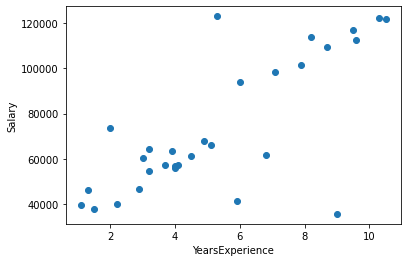

In [ ]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x=df['YearsExperience'],y=df['Salary'])

Наблюдается линейная зависимость, однако в данных присутствуют выбросы.

Очевидно, что зарплата не должна зависеть от этажа, на котором работает сотрудник. Проверим это с помощью графиков.

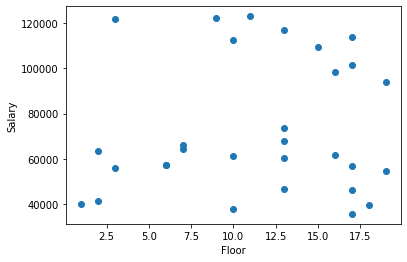

In [ ]:
plt.xlabel("Floor")
plt.ylabel("Salary")
plt.scatter(x=df['Floor'],y=df['Salary'])

Зависимости не наблюдается.

И, скорее всего, зарплата не зависит от типа работы.

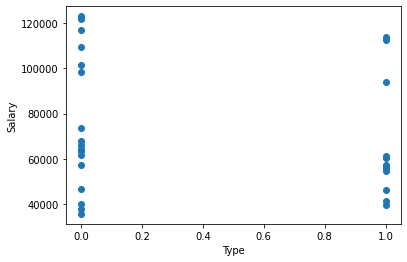

In [ ]:
plt.xlabel("Type")
plt.ylabel("Salary")
plt.scatter(x=df['Type'],y=df['Salary'])

Зависимости также не наблюдается.

Действительно, зарплата явно зависит от опыта работы сотрудника и не зависит от этажа, на котором он работает, и типа работы.

Попробуем построить модель линейной регрессии зависимости Salary от остальных параметров. И дополнительно добавим ещё признаков на незначимых переменных.

In [ ]:
df['x'] = df['Floor'] ** 2

In [ ]:
train_df, test_df  = train_test_split(df, test_size=0.3, random_state=3)

In [ ]:
train_df = train_df.sort_values(by='YearsExperience', ascending=False)
train_X = train_df[['YearsExperience', 'Floor', 'Type', 'x']]
train_y = train_df[['Salary']]

test_df = test_df.sort_values(by='YearsExperience', ascending=False)
test_X = test_df[['YearsExperience', 'Floor', 'Type', 'x']]
test_y = test_df[['Salary']]

Построим простую модель регресии на всех данных и оценим её качество.

In [ ]:
linear_regression = LinearRegression() 
linear_regression.fit(train_X, train_y)

LinearRegression()

In [ ]:
# вывод точности предсказания
print(linear_regression.score(train_X, train_y))
print(linear_regression.score(test_X, test_y))

0.5880177111217566
0.2614320695708129


In [ ]:
# коэффициенты модели
print('w_0:', linear_regression.intercept_)
coef = list(linear_regression.coef_[0])
for i in range(len(coef)):
  print(f'w_{i+1}:', coef[i], train_X.columns[i])

w_0: [20548.76734613]
w_1: 6698.547721881234 YearsExperience
w_2: 6284.331540304584 Floor
w_3: 6926.782218631161 Type
w_4: -328.8162340973986 x


Несмотря на то, что этаж никак не влияет на целевую функцию, эта переменная присутствует в модели с коэффициентом 6698, а квадрат этой переменной — с отрицательным знаком. Что явно вносит путаницу в понимание модели.
Более того, качество модели на тестовой выборке сильно ниже, чем на обучающей.

Посмотрим на предсказания модели.

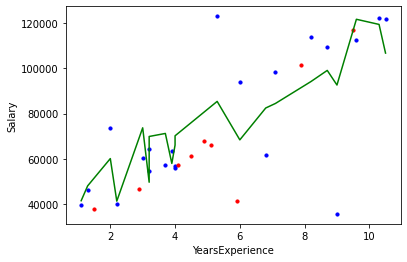

In [ ]:
y_predict_train = linear_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Воспользуемся регуляризацией.

## Ridge

Для обучения модели с L2-регуляризацией импортрируем `from sklearn.linear_model import Ridge`.

In [ ]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.1)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(train_X, train_y)

Ridge(alpha=0.1)

In [ ]:
# вывод точности предсказания
print(ridge_regression.score(train_X, train_y))
print(ridge_regression.score(test_X, test_y))

0.5880094396660369
0.26557903244823244


In [ ]:
# коэффициенты модели
print('w_0:', ridge_regression.intercept_)
print('w_i:', ridge_regression.coef_)

w_0: [20713.09231767]
w_i: [[6689.99028928 6258.35506226 6729.75540192 -327.2544208 ]]


Попробуем подобрать параметр регуляризации.

In [ ]:
coef = []
for i in range(-7, -1):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train_X, train_y)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train_X, train_y))
  print(ridge_regression.score(test_X, test_y))

----- lambda = 1e-07 -----
0.5880177111217566
0.26143207384238243
----- lambda = 1e-06 -----
0.5880177111217556
0.2614321122864748
----- lambda = 1e-05 -----
0.5880177111216697
0.2614324967262538
----- lambda = 0.0001 -----
0.5880177111130565
0.26143634100953184
----- lambda = 0.001 -----
0.5880177102521477
0.261474772399897
----- lambda = 0.01 -----
0.5880176245610713
0.2618579455880069


In [ ]:
coef = pd.DataFrame(coef, columns=train_X.columns)
coef

,YearsExperience,Floor,Type,x
0,6698.547713,6284.331514,6926.782016,-328.816233
1,6698.547634,6284.331278,6926.780194,-328.816218
2,6698.546848,6284.328912,6926.761975,-328.816076
3,6698.538981,6284.305262,6926.579783,-328.814648
4,6698.460326,6284.068780,6924.758364,-328.800379
5,6697.675460,6281.706718,6906.593581,-328.657905


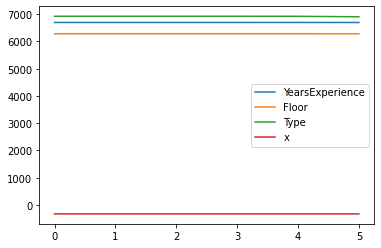

In [ ]:
coef.plot()

Посмотрим, как изменились предсказания модели.

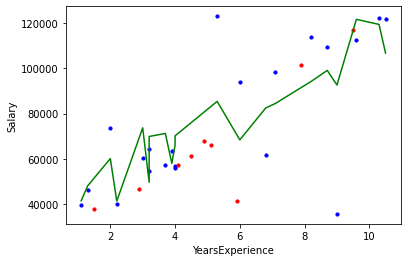

In [ ]:
y_predict_train = ridge_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Видим, что почти ничего не изменилось.
Попробуем предварительно нормализовать данные и только потом строить модель.

Нормализация — это процесс масштабирования отдельных образцов в единичную норму.

Произведём номализацию с помощью метода `normalize()` в `sklearn`.

Посмотрите пример:

In [ ]:
from sklearn import preprocessing

example = pd.DataFrame({'x1': [0, 1, 200], 
                        'x2': [1000, 1500, 2000]})
example

,x1,x2
0,0,1000
1,1,1500
2,200,2000


In [ ]:
preprocessing.normalize(example, axis=0)

array([[0.        , 0.37139068],
       [0.00499994, 0.55708601],
       [0.9999875 , 0.74278135]])

Произведём нормализацию наших данных.

In [ ]:
from sklearn import preprocessing

d = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(d, columns=df.columns)
scaled_df.head()

,YearsExperience,Floor,Type,Salary,x
0,0.033464,0.260569,0.288675,0.091122,0.299985
1,0.039549,0.246093,0.288675,0.107015,0.267579
2,0.045633,0.144760,0.000000,0.087388,0.092588
3,0.060844,0.188189,0.000000,0.170290,0.156474
4,0.066928,0.014476,0.000000,0.092391,0.000926


In [ ]:
train_df, test_df  = train_test_split(scaled_df, test_size=0.3, random_state=3)

In [ ]:
train_df = train_df.sort_values(by='YearsExperience', ascending=False)
train_X = train_df[['YearsExperience', 'Floor', 'Type', 'x']]
train_y = train_df[['Salary']]

test_df = test_df.sort_values(by='YearsExperience', ascending=False)
test_X = test_df[['YearsExperience', 'Floor', 'Type', 'x']]
test_y = test_df[['Salary']]

In [ ]:
coef = []
for i in range(-7, -1):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train_X, train_y)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train_X, train_y))
  print(ridge_regression.score(test_X, test_y))

----- lambda = 1e-07 -----
0.5880177110819766
0.261439747197185
----- lambda = 1e-06 -----
0.5880177071454736
0.2615088222981591
----- lambda = 1e-05 -----
0.5880173152121784
0.26219725045418707
----- lambda = 0.0001 -----
0.587979779014098
0.268856274759424
----- lambda = 0.001 -----
0.5854326622531714
0.3183303079496179
----- lambda = 0.01 -----
0.5524439588412442
0.41920291494768924


In [ ]:
coef = pd.DataFrame(coef, columns=train_X.columns)
coef

,YearsExperience,Floor,Type,x
0,0.509974,1.005432,0.055574,-0.822513
1,0.509980,1.005210,0.055568,-0.822346
2,0.510045,1.002988,0.055509,-0.820672
3,0.510671,0.981293,0.054933,-0.804322
4,0.515128,0.806242,0.050141,-0.672311
5,0.508236,0.283210,0.031046,-0.274886


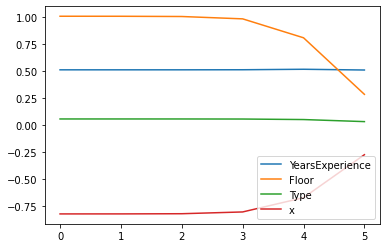

In [ ]:
coef.plot()

Посмотрим, как изменились предсказания модели.

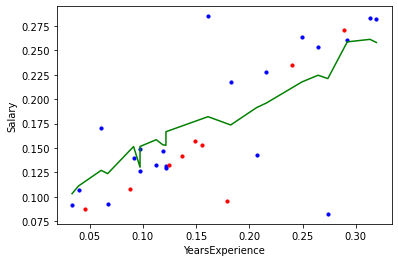

In [ ]:
y_predict_train = ridge_regression.predict(train_X)

plt.scatter(train_X['YearsExperience'], train_y, s=10, c='b')
plt.scatter(test_X['YearsExperience'], test_y, s=10, c='r')
plt.plot(train_X['YearsExperience'], y_predict_train, c='g')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Видим, что при нормализации данных и правильном подборе параметра `lambda` с помощью регуляризации можно повысить её качество.